<a href="https://colab.research.google.com/github/CristhianSeverino/Data_Engeerig/blob/En-proceso/Aprende_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quieres Aprender A crear Graficos Invreibles con Pytho, con este Notebook lo Lograras**

> 🐱‍👓Este Notebook es creacion de: **Cristhian Calle Severino**.

**Si este Notebook te fue de ayuda, me encantaria saberlo**
**Diviertete Creando**☕

*   **Github**: https://github.com/CristhianSeverino
*   **Linkedin**: https://www.linkedin.com/in/cristhianandrescalleseverino/


# **Instalacción E Importación de Librerias**📚

> verifica la instalación, desplegado la celda. despues de ejecutar deberia arrojar un prit de confirmacion🐱‍👓

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta
import random


**Style** Permite configurar tus graficos un estilo graficoque apoye tu narrativa. Reecuerda todo analisis debe tener una narrativa, coherente y atractiva

In [3]:

# Configuración de Seaborn para gráficos con mejor estética
sns.set_theme(style="whitegrid")

# **Creación de Datos Sinteticos** 🤖

  * En las siguientes celdas usaremos una funcion parra crear nuestro dat set sintetico. Emularemos un ecomerce, valido para emular una SaaS🐱‍💻
  * Adaptalas acorde a lo que necesites o quieras crear.**Puedes agrandar los datasets, a tu gusto 😎**.
  *Si gustas agregar metricas u otro tipo de datos modifica la cuncion. Tambien puedes cmabiar de tipo de industria. atrevete a Crear y explorar🦾.

**Diviertete Explorando este Proyecto y creando con el. Prospero día ☕**

In [4]:
def generar_metricas_ecommerce(fecha_inicio, dias=365):
    """
    Genera un DataFrame con métricas diarias simuladas de e-commerce (Ventas y Gastos).

    Args:
        fecha_inicio (str): Fecha de inicio en formato 'YYYY-MM-DD'.
        dias (int): Número de días a simular (por defecto, 365).

    Returns:
        pd.DataFrame: DataFrame con las métricas diarias.
    """
    fecha_inicio_dt = pd.to_datetime(fecha_inicio)
    fechas = [fecha_inicio_dt + timedelta(days=i) for i in range(dias)]

    # ----------------------------------------------------
    # Generación de Métricas de Ventas Simuladas
    # ----------------------------------------------------
    # Simulación de una tendencia ascendente general con ruido
    base_ventas = np.linspace(500, 1500, dias) + np.random.normal(0, 150, dias)
    # Simulación de estacionalidad (ej. picos al final del año o en días específicos)
    estacionalidad_semanal = [random.choice([0.9, 1.1, 1.0, 1.0, 1.0, 1.3, 1.5]) for _ in range(dias)] # Fines de semana con picos
    estacionalidad_mensual = np.sin(np.linspace(0, 2 * np.pi * 12, dias)) * 200 # Ciclos mensuales

    ventas_totales = (base_ventas + estacionalidad_mensual) * estacionalidad_semanal
    ventas_totales = np.maximum(50, ventas_totales) # Asegurar valor mínimo

    # Otras métricas de ventas
    pedidos = (ventas_totales / np.random.uniform(50, 150, dias)).astype(int)
    tasa_conversion = np.random.uniform(0.01, 0.04, dias)
    visitas_web = (pedidos / tasa_conversion).astype(int)

    # ----------------------------------------------------
    # Generación de Métricas de Gastos Simuladas
    # ----------------------------------------------------
    # Costo de los bienes vendidos (COGS) como un % de las ventas
    cogs = ventas_totales * np.random.uniform(0.30, 0.45, dias)

    # Gasto en marketing (con estacionalidad)
    base_marketing = np.linspace(100, 300, dias) + np.random.normal(0, 50, dias)
    gastos_marketing = np.maximum(50, base_marketing * random.choice([0.8, 1.2]))

    # Gastos fijos (ej. salarios, hosting) con ruido
    gastos_fijos = np.random.normal(200, 20, dias)

    gastos_totales = cogs + gastos_marketing + gastos_fijos

    # Cálculo de la métrica clave: Beneficio (Ventas - Gastos)
    beneficio = ventas_totales - gastos_totales

    # Crear el DataFrame
    df = pd.DataFrame({
        'Fecha': fechas,
        'Ventas_Totales': ventas_totales.round(2),
        'Pedidos_Totales': pedidos,
        'Visitas_Web': visitas_web,
        'Costo_Bienes_Vendidos': cogs.round(2),
        'Gasto_Marketing': gastos_marketing.round(2),
        'Gastos_Fijos': gastos_fijos.round(2),
        'Gastos_Totales': gastos_totales.round(2),
        'Beneficio': beneficio.round(2)
    })

    # Establecer la fecha como índice para facilitar el análisis de series de tiempo
    df = df.set_index('Fecha')

    return df



In [5]:
# ----------------------------------------------------
# Generar el DataFrame para un año
# ----------------------------------------------------
df_ecommerce = generar_metricas_ecommerce('2024-01-01', dias=366) # 2024 es bisiesto
print("Primeras 5 filas del DataFrame:")
print(df_ecommerce.head())
print("\nInformación del DataFrame:")
df_ecommerce.info()

Primeras 5 filas del DataFrame:
            Ventas_Totales  Pedidos_Totales  Visitas_Web  \
Fecha                                                      
2024-01-01          562.47                5          167   
2024-01-02          431.81                5          131   
2024-01-03          605.37                5          356   
2024-01-04          534.38                9          580   
2024-01-05          681.55                6          218   

            Costo_Bienes_Vendidos  Gasto_Marketing  Gastos_Fijos  \
Fecha                                                              
2024-01-01                 178.02           140.36        170.72   
2024-01-02                 135.60           123.67        180.54   
2024-01-03                 187.32            50.00        230.44   
2024-01-04                 174.18           247.88        208.55   
2024-01-05                 301.69            60.49        225.97   

            Gastos_Totales  Beneficio  
Fecha                         

# **Step 3** 10 Ejercicios de Visualización con Seaborn 📊
A continuación, se presentan 10 ejemplos de visualizaciones utilizando Seaborn para explorar el DataFrame generado.

---
**Ejercicio 1:** Tendencia Anual de Ventas y Gastos (Gráfico de Líneas)
Este gráfico de líneas es fundamental para ver la evolución de las métricas clave a lo largo del tiempo.


> plt.figure(figsize=(14, 6))

> sns.lineplot(data=df_ecommerce, y='Ventas_Totales', x=df_ecommerce.index, label='Ventas Totales', linewidth=2)

> sns.lineplot(data=df_ecommerce, y='Gastos_Totales', x=df_ecommerce.index, label='Gastos Totales', linewidth=2)

> plt.title('Tendencia Diaria de Ventas y Gastos a lo largo del Año')

> plt.xlabel('Fecha')

> plt.ylabel('Monto (€)')

> plt.legend()

> plt.xticks(rotation=45)

> plt.tight_layout()

> plt.savefig('Tendencia Diaria de Ventas y Gastos a lo largo del Año.png')

> plt.show()

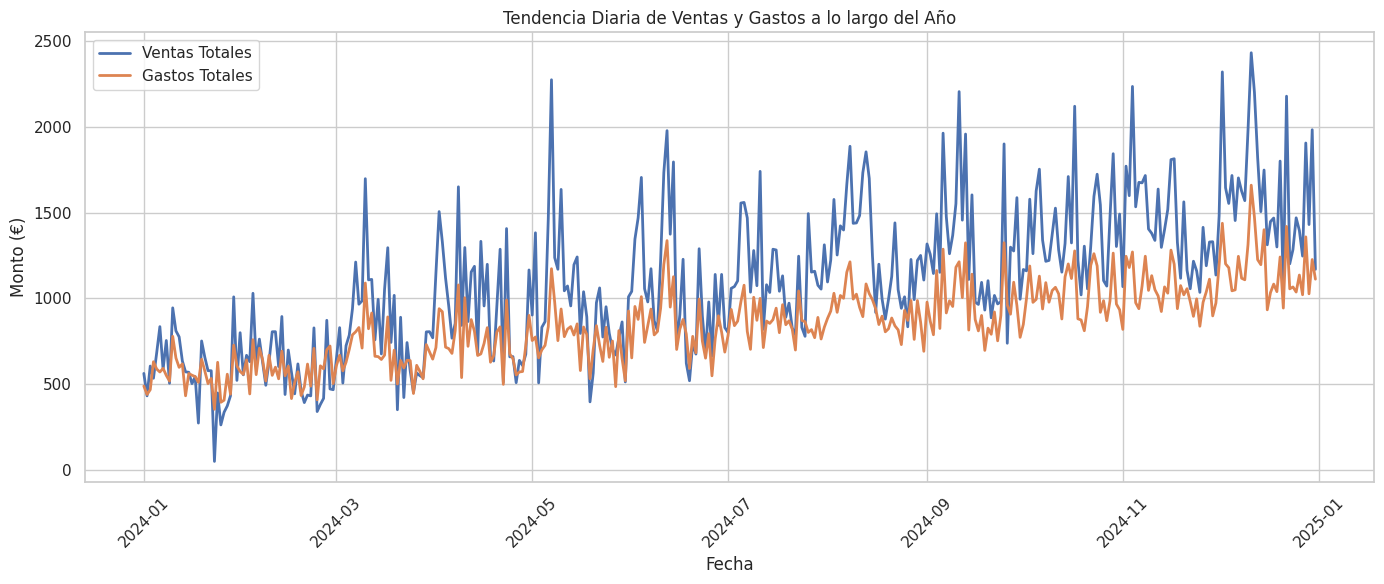

In [10]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_ecommerce, y='Ventas_Totales', x=df_ecommerce.index, label='Ventas Totales', linewidth=2)
sns.lineplot(data=df_ecommerce, y='Gastos_Totales', x=df_ecommerce.index, label='Gastos Totales', linewidth=2)
plt.title('Tendencia Diaria de Ventas y Gastos a lo largo del Año')
plt.xlabel('Fecha')
plt.ylabel('Monto (€)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Tendencia Diaria de Ventas y Gastos a lo largo del Año.png')
plt.show()

---
**Ejercicio 2: Distribución de Ventas Diarias (Histograma y KDE)**

> Un histograma y un gráfico de Densidad (KDE) nos muestran la frecuencia con la que ocurren ciertos rangos de valores de ventas.

plt.figure(figsize=(10, 6))

sns.histplot(df_ecommerce['Ventas_Totales'], kde=True, bins=30, color='skyblue')

plt.title('Distribución de las Ventas Diarias')

plt.xlabel('Ventas Totales (€)')

plt.ylabel('Frecuencia')

plt.savefig('Distribución de las Ventas Diarias Histograma.png')

plt.show()

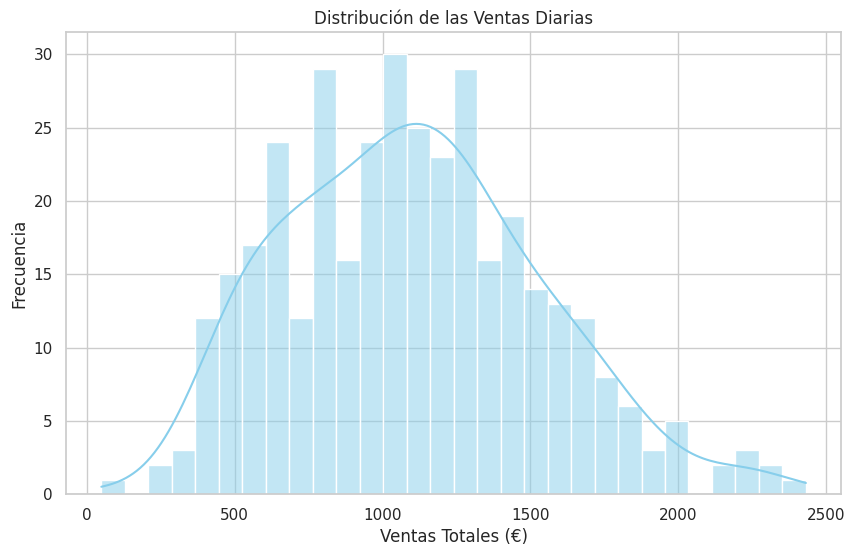

In [11]:
plt.figure(figsize=(10, 6))

sns.histplot(df_ecommerce['Ventas_Totales'], kde=True, bins=30, color='skyblue')

plt.title('Distribución de las Ventas Diarias')

plt.xlabel('Ventas Totales (€)')

plt.ylabel('Frecuencia')

plt.savefig('Distribución de las Ventas Diarias Histograma.png')

plt.show()

---
**Ejercicio 3: Relación entre Visitas y Pedidos (Gráfico de Dispersión)**

>Un scatterplot es ideal para visualizar la correlación entre dos variables numéricas, en este caso, el tráfico web y el número de pedidos.

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Visitas_Web', y='Pedidos_Totales', data=df_ecommerce, alpha=0.6)

plt.title('Relación entre Visitas Web y Pedidos Totales 🔗')

plt.xlabel('Visitas Web')

plt.ylabel('Pedidos Totales')

plt.savefig('Relación entre Visitas Web y Pedidos Totales.png')

plt.show()

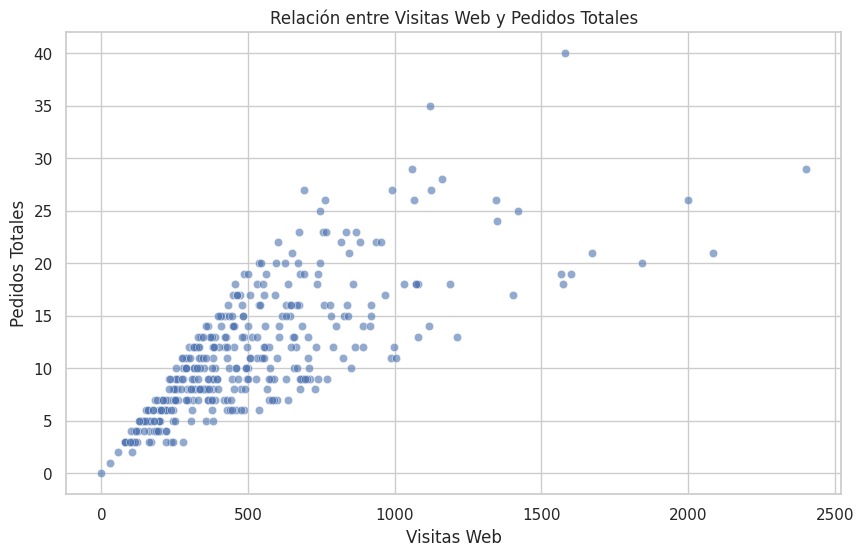

In [12]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Visitas_Web', y='Pedidos_Totales', data=df_ecommerce, alpha=0.6)

plt.title('Relación entre Visitas Web y Pedidos Totales')

plt.xlabel('Visitas Web')

plt.ylabel('Pedidos Totales')

plt.savefig('Relación entre Visitas Web y Pedidos Totales.png')

plt.show()

---
**Ejercicio 4: Desglose de Gastos Mensuales (Gráfico de Barras Agrupadas)**

> Para ver el impacto de cada componente de gasto mes a mes. Primero, se agrupan los datos.


df_mensual = df_ecommerce.resample('M').sum()

df_mensual['Mes'] = df_mensual.index.strftime('%Y-%m')


df_gastos_desglose = df_mensual[['Mes', 'Costo_Bienes_Vendidos', 'Gasto_Marketing', 'Gastos_Fijos']].melt(
    id_vars='Mes', var_name='Tipo_Gasto', value_name='Monto')

plt.figure(figsize=(14, 7))

sns.barplot(x='Mes', y='Monto', hue='Tipo_Gasto', data=df_gastos_desglose, palette='viridis')

plt.title('Desglose de Gastos por Mes')

plt.xlabel('Mes')

plt.ylabel('Monto Acumulado (€)')

plt.xticks(rotation=45)

plt.legend(title='Tipo de Gasto')

plt.tight_layout()

plt.savefig('Desglose de Gastos por Mes')

plt.show()

/tmp/ipython-input-1822461288.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_mensual = df_ecommerce.resample('M').sum()


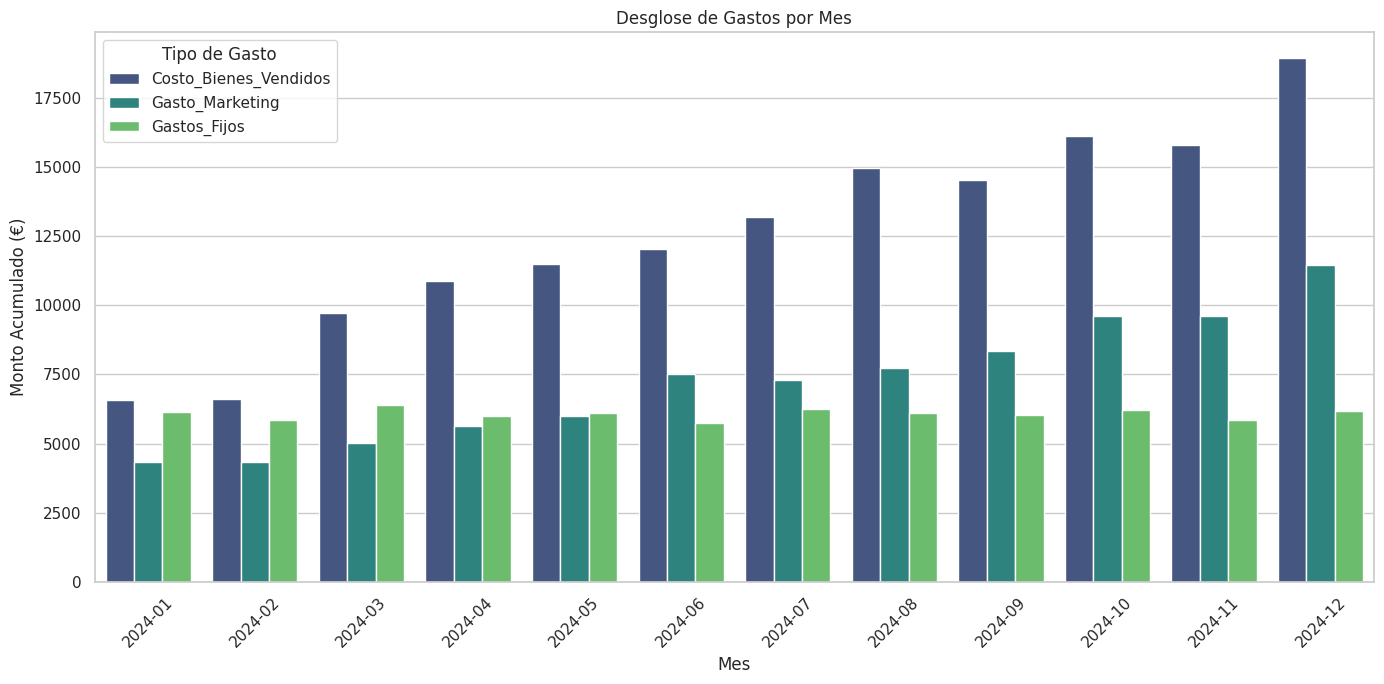

In [14]:
df_mensual = df_ecommerce.resample('M').sum()

df_mensual['Mes'] = df_mensual.index.strftime('%Y-%m')


df_gastos_desglose = df_mensual[['Mes', 'Costo_Bienes_Vendidos', 'Gasto_Marketing', 'Gastos_Fijos']].melt(
    id_vars='Mes', var_name='Tipo_Gasto', value_name='Monto')

plt.figure(figsize=(14, 7))

sns.barplot(x='Mes', y='Monto', hue='Tipo_Gasto', data=df_gastos_desglose, palette='viridis')

plt.title('Desglose de Gastos por Mes')

plt.xlabel('Mes')

plt.ylabel('Monto Acumulado (€)')

plt.xticks(rotation=45)

plt.legend(title='Tipo de Gasto')

plt.tight_layout()

plt.savefig('Desglose de Gastos por Mes')

plt.show()

---
**Ejercicio 5: Tendencia del Beneficio con Suavizado (Gráfico de Líneas con Estimación)**

> Utilizamos lineplot para la tendencia del beneficio diario, y el intervalo de confianza (CI) de Seaborn nos ayuda a ver la dispersión de los datos.

***Usamos 'Semana' como X y establecemos errorbar=None para mostrar solo la línea media***

df_ecommerce['Semana'] = df_ecommerce.index.isocalendar().week.astype(int)

plt.figure(figsize=(14, 6))

sns.lineplot(data=df_ecommerce, x='Semana', y='Beneficio', estimator='mean', errorbar=('ci', 95), color='darkgreen')

plt.title('Beneficio Promedio Semanal con Intervalo de Confianza del 95%')

plt.xlabel('Semana del Año')

plt.ylabel('Beneficio Promedio Diario (€)')

plt.tight_layout()

plt.savefig('Beneficio Promedio Semanal con Intervalo de Confianza del 95%')

plt.show()

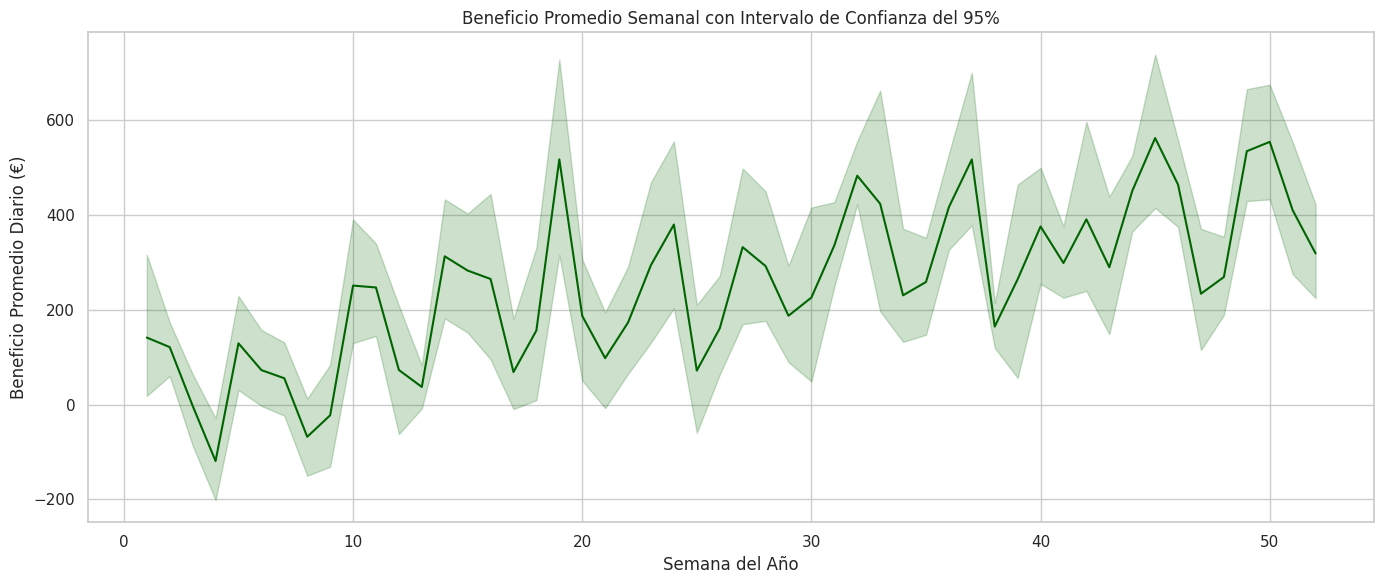

In [16]:
df_ecommerce['Semana'] = df_ecommerce.index.isocalendar().week.astype(int)

plt.figure(figsize=(14, 6))
# Usamos 'Semana' como X y establecemos errorbar=None para mostrar solo la línea media
sns.lineplot(data=df_ecommerce, x='Semana', y='Beneficio', estimator='mean', errorbar=('ci', 95), color='darkgreen')

plt.title('Beneficio Promedio Semanal con Intervalo de Confianza del 95%')

plt.xlabel('Semana del Año')

plt.ylabel('Beneficio Promedio Diario (€)')

plt.tight_layout()

plt.savefig('Beneficio Promedio Semanal con Intervalo de Confianza del 95%')

plt.show()

---
**Ejercicio 6: Comparación de Ventas por Día de la Semana (Gráfico de Caja - Boxplot)**

> El boxplot es excelente para comparar la distribución de una métrica a través de diferentes categorías (días de la semana).

df_ecommerce['Dia_Semana'] = df_ecommerce.index.day_name()
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 6))

sns.boxplot(x='Dia_Semana', y='Ventas_Totales', data=df_ecommerce, order=orden_dias, palette='pastel')

plt.title('Distribución de Ventas por Día de la Semana')

plt.xlabel('Día de la Semana')

plt.ylabel('Ventas Totales (€)')

plt.savefig('Distribución de Ventas por Día de la Semana')

plt.show()

/tmp/ipython-input-2795959202.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dia_Semana', y='Ventas_Totales', data=df_ecommerce, order=orden_dias, palette='pastel')


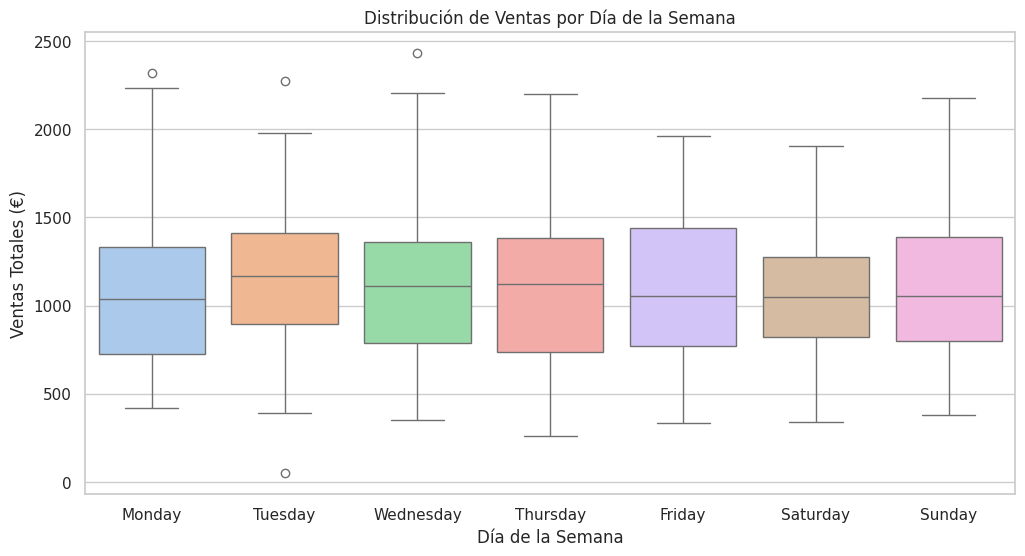

In [18]:
df_ecommerce['Dia_Semana'] = df_ecommerce.index.day_name()
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 6))
sns.boxplot(x='Dia_Semana', y='Ventas_Totales', data=df_ecommerce, order=orden_dias, palette='pastel')
plt.title('Distribución de Ventas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas Totales (€)')
plt.savefig('Distribución de Ventas por Día de la Semana')
plt.show()

**Ejercicio 7: Mapa de Calor (Heatmap) de la Matriz de Correlación**

> Un heatmap para visualizar la correlación entre todas las variables numéricas, lo cual ayuda a identificar relaciones rápidamente.

plt.figure(figsize=(10, 8))

**# Calcular la matriz de correlación**

correlacion = df_ecommerce.select_dtypes(include=np.number).corr()

**# Crear el mapa de calor**

sns.heatmap(correlacion, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=.5)

plt.title('Mapa de Calor de la Matriz de Correlación entre Métricas')

plt.tight_layout()

plt.savefig('Mapa de Calor de la Matriz de Correlación entre Métricas')

plt.show()

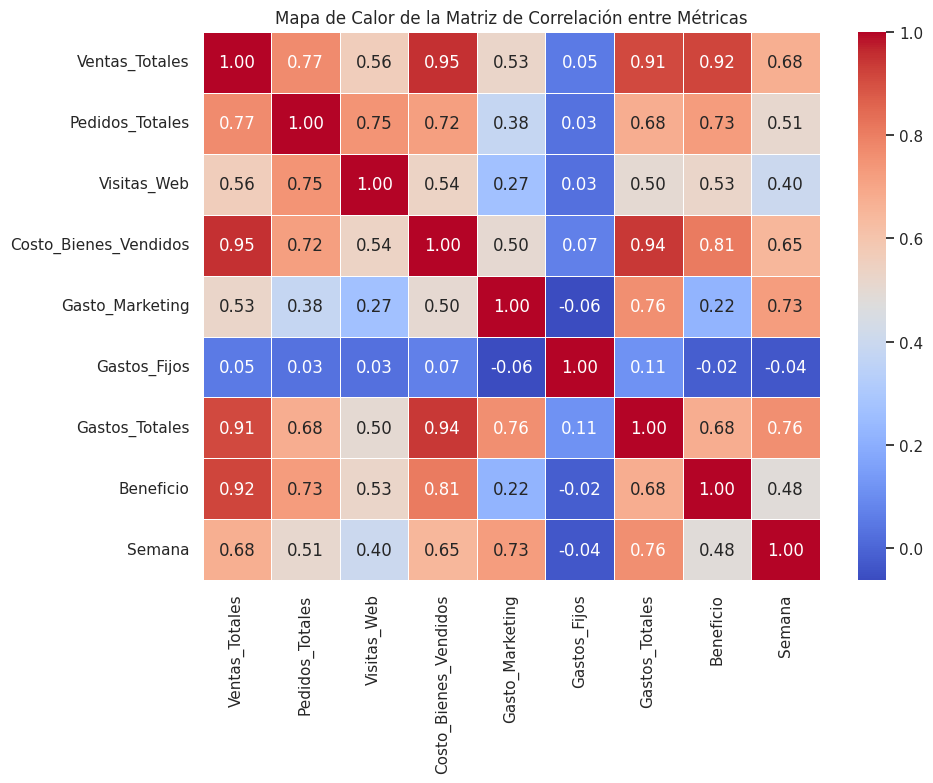

In [19]:
plt.figure(figsize=(10, 8))

# Calcular la matriz de correlación

correlacion = df_ecommerce.select_dtypes(include=np.number).corr()

# Crear el mapa de calor

sns.heatmap(correlacion, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=.5)

plt.title('Mapa de Calor de la Matriz de Correlación entre Métricas')

plt.tight_layout()

plt.savefig('Mapa de Calor de la Matriz de Correlación entre Métricas')

plt.show()

---
**Ejercicio 8: Comparación de la Distribución del Beneficio por Trimestre (Gráfico de Violín - Violinplot)**

> El violinplot combina un boxplot con una estimación de densidad, dando una visión más rica de la distribución.

df_ecommerce['Trimestre'] = df_ecommerce.index.quarter.astype(str)

plt.figure(figsize=(10, 6))

sns.violinplot(x='Trimestre', y='Beneficio', data=df_ecommerce, palette='Set2', inner='quartile')

plt.title('Distribución de Beneficio por Trimestre del Año')

plt.xlabel('Trimestre')

plt.ylabel('Beneficio Diario (€)')

plt.savefig('Distribución de Beneficio por Trimestre del Año')

plt.show()

/tmp/ipython-input-399514405.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Trimestre', y='Beneficio', data=df_ecommerce, palette='Set2', inner='quartile')


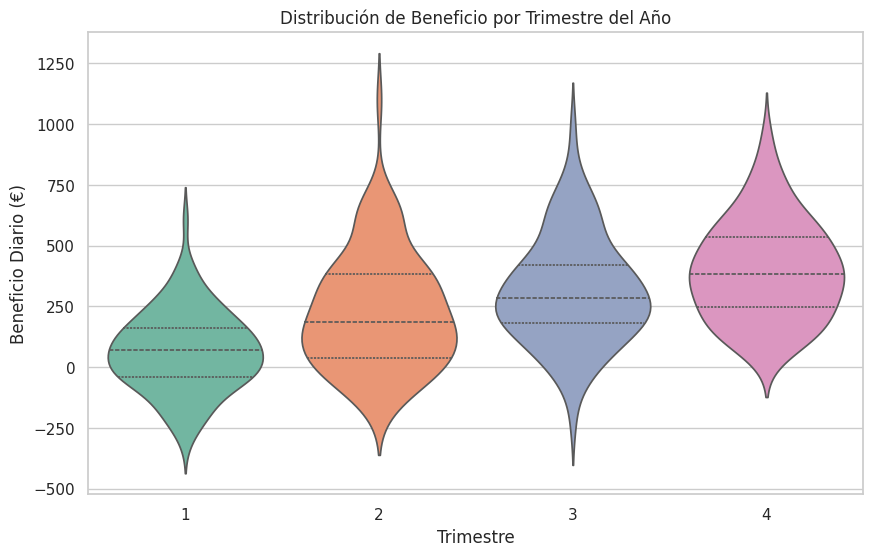

In [20]:
df_ecommerce['Trimestre'] = df_ecommerce.index.quarter.astype(str)

plt.figure(figsize=(10, 6))

sns.violinplot(x='Trimestre', y='Beneficio', data=df_ecommerce, palette='Set2', inner='quartile')

plt.title('Distribución de Beneficio por Trimestre del Año')

plt.xlabel('Trimestre')

plt.ylabel('Beneficio Diario (€)')

plt.savefig('Distribución de Beneficio por Trimestre del Año')

plt.show()

---
**Ejercicio 9: Matriz de Dispersión (PairPlot) para Variables Clave**

> El pairplot crea una matriz de gráficos de dispersión para todas las combinaciones de pares de variables, además de histogramas en la diagonal. Es útil para un vistazo rápido a múltiples relaciones.

sns.pairplot(df_ecommerce[['Ventas_Totales', 'Gasto_Marketing', 'Pedidos_Totales', 'Beneficio']].sample(500, replace=True),
             kind='scatter', height=2, corner=True)

plt.suptitle('Matriz de Dispersión entre Métricas Clave (Muestra de 500 días)', y=1.02, fontsize=16)

plt.savefig('Matriz de Dispersión entre Métricas Clave (Muestra de 500 días)')

plt.show()

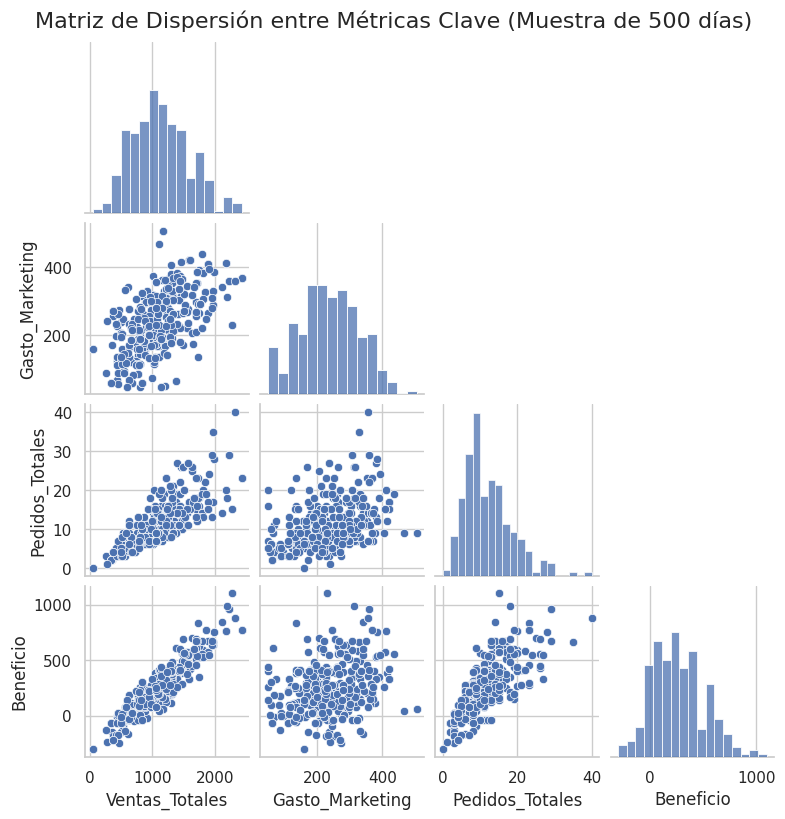

In [23]:
sns.pairplot(df_ecommerce[['Ventas_Totales', 'Gasto_Marketing', 'Pedidos_Totales', 'Beneficio']].sample(500, replace=True), # Muestra para mayor rapidez
             kind='scatter', height=2, corner=True)

plt.suptitle('Matriz de Dispersión entre Métricas Clave (Muestra de 500 días)', y=1.02, fontsize=16)

plt.savefig('Matriz de Dispersión entre Métricas Clave (Muestra de 500 días)')

plt.show()

**Ejercicio 10: Tendencia de la Tasa de Conversión (Gráfico de Regresión)**

Un regplot o lmplot es excelente para graficar la relación entre dos variables e incluir una línea de regresión lineal para visualizar la tendencia general. Dado que ya vimos la relación, usemos las métricas para calcular y visualizar la Tasa de Conversión diaria para ver su tendencia.

Primero, calculamos la tasa de conversión simulada:

df_ecommerce['Tasa_Conversion'] = df_ecommerce['Pedidos_Totales'] / df_ecommerce['Visitas_Web']

df_ecommerce['Dia_Anio'] = np.arange(1, len(df_ecommerce) + 1) # Día 1 a 366

plt.figure(figsize=(12, 6))

**# Usamos regplot para ver la tendencia con una línea de regresión**

sns.regplot(x='Dia_Anio', y='Tasa_Conversion', data=df_ecommerce,
            scatter_kws={'alpha':0.4, 's':20}, line_kws={'color':'red'})

plt.title('Tendencia de la Tasa de Conversión Diaria con Regresión Lineal')

plt.xlabel('Día del Año')

plt.ylabel('Tasa de Conversión (Decimal)')

plt.savefig('Tendencia de la Tasa de Conversión Diaria con Regresión Lineal')

plt.show()

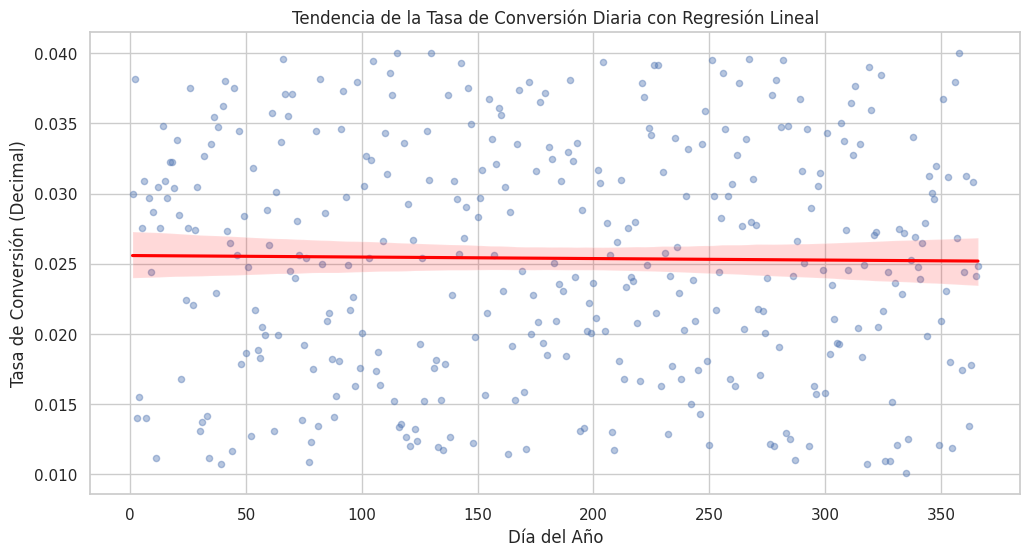

In [24]:
df_ecommerce['Tasa_Conversion'] = df_ecommerce['Pedidos_Totales'] / df_ecommerce['Visitas_Web']

df_ecommerce['Dia_Anio'] = np.arange(1, len(df_ecommerce) + 1) # Día 1 a 366

plt.figure(figsize=(12, 6))

# Usamos regplot para ver la tendencia con una línea de regresión

sns.regplot(x='Dia_Anio', y='Tasa_Conversion', data=df_ecommerce, scatter_kws={'alpha':0.4, 's':20}, line_kws={'color':'red'})

plt.title('Tendencia de la Tasa de Conversión Diaria con Regresión Lineal')

plt.xlabel('Día del Año')

plt.ylabel('Tasa de Conversión (Decimal)')

plt.savefig('Tendencia de la Tasa de Conversión Diaria con Regresión Lineal')

plt.show()